In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''

import argparse

%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data import EMNISTLines2

In [2]:
dataset = EMNISTLines2(args=argparse.Namespace())
dataset.prepare_data()
dataset.setup()
print(dataset)

c:\Users\user\pytorch\lib\site-packages\pytorch_lightning\core\datamodule.py:175: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation("DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.")
c:\Users\user\pytorch\lib\site-packages\pytorch_lightning\core\datamodule.py:170: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation("DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.")


EMNISTLines2 loading data from HDF5...
EMNISTLines2 Dataset
Min overlap: 0.2
Max overlap: 0.5
Num classes: 83
Dims: (1, 56, 1024)
Output dims: (89, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 56, 1024]), torch.float32, tensor(0.), tensor(0.0156), tensor(0.0943), tensor(0.9922))
Batch y stats: (torch.Size([128, 89]), torch.int64, tensor(1), tensor(66))



In [3]:
def convert_y_label_to_string(y, dataset=dataset):
    return "".join(dataset.mapping[i] for i in y if i !=3) # padding 토큰 제외

y_example = dataset.data_train[0][1]
print(y_example, y_example.shape)
convert_y_label_to_string(y_example)

tensor([ 1, 55, 47, 40, 58, 44, 66, 54, 45, 66, 27, 44, 62, 40, 57, 50, 66, 62,
        48, 51, 51,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3]) torch.Size([89])


'<S>phase of Newark will<E>'

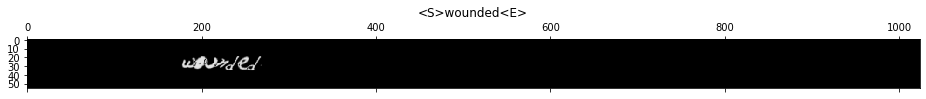

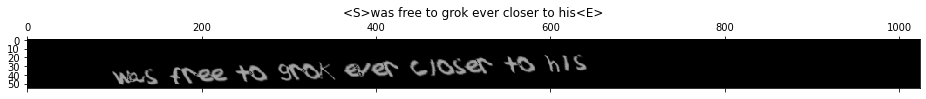

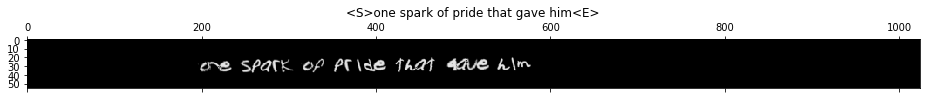

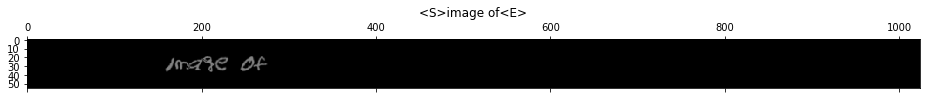

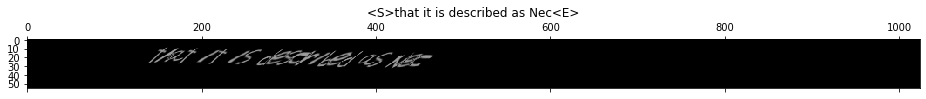

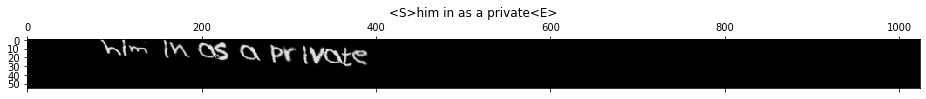

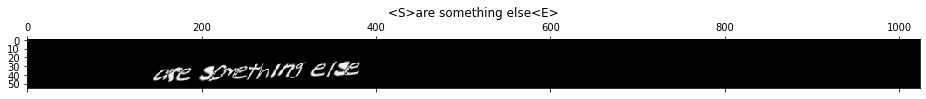

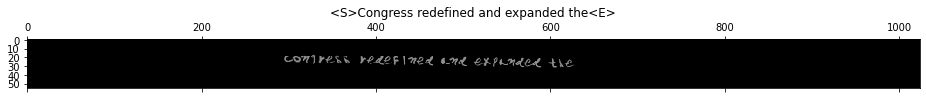

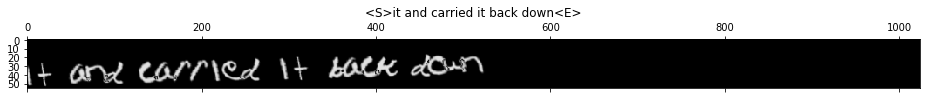

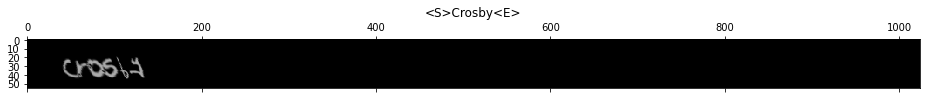

In [4]:
X, Y = next(iter(dataset.train_dataloader()))
for i in range(10):
    x, y = X[i], Y[i]
    sentence = convert_y_label_to_string(y)
    plt.matshow(x.squeeze(), cmap="gray", vmin=0, vmax=1)
    plt.title(sentence)

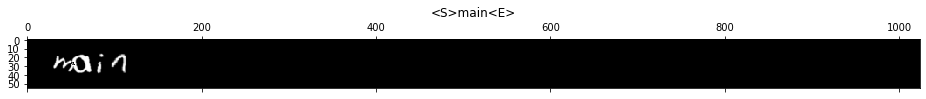

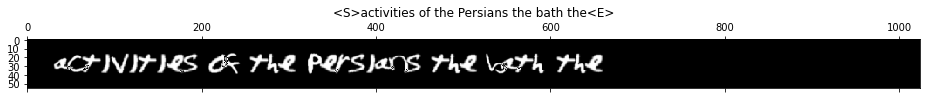

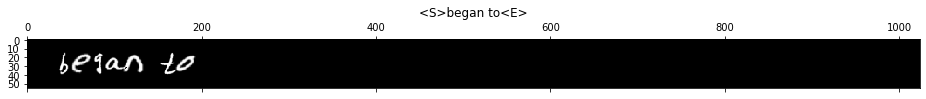

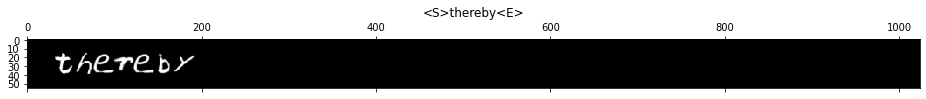

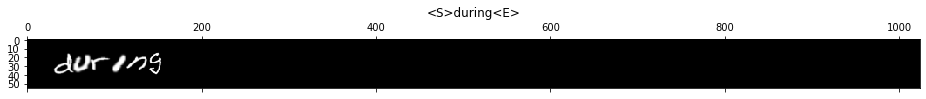

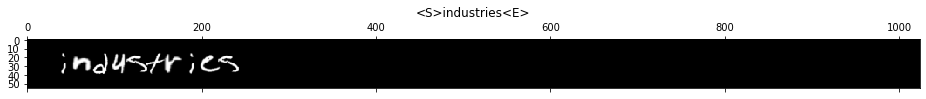

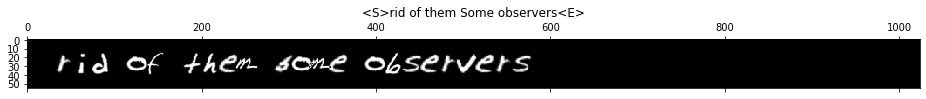

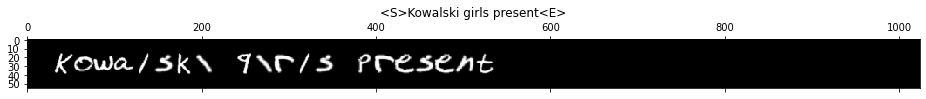

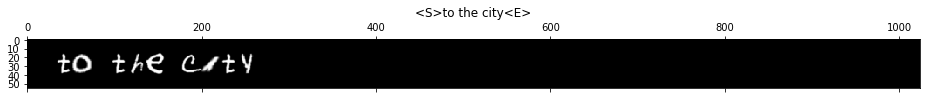

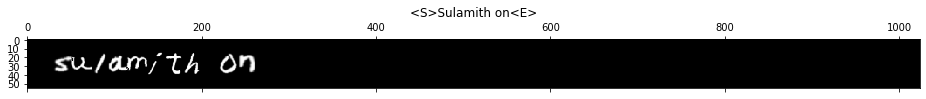

In [5]:
X, Y = next(iter(dataset.test_dataloader()))
for i in range(10):
    x, y = X[i], Y[i]
    sentence = convert_y_label_to_string(y)
    plt.matshow(x.squeeze(), cmap="gray", vmin=0, vmax=1)
    plt.title(sentence)

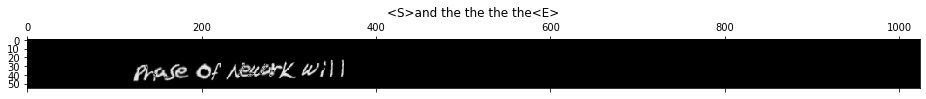

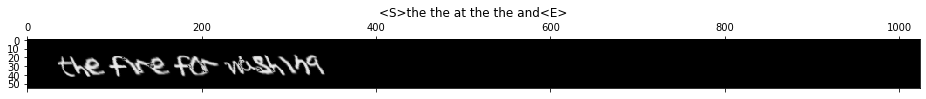

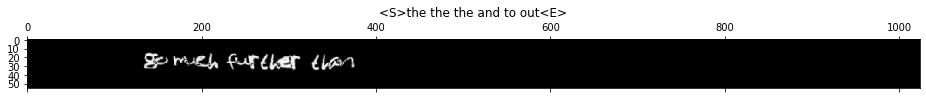

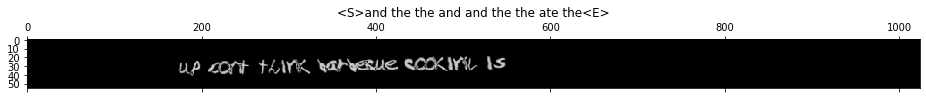

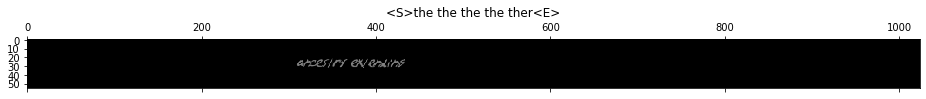

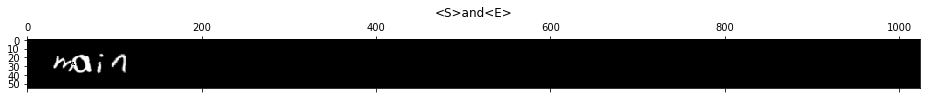

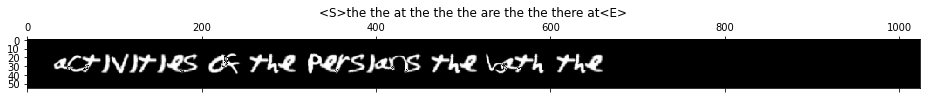

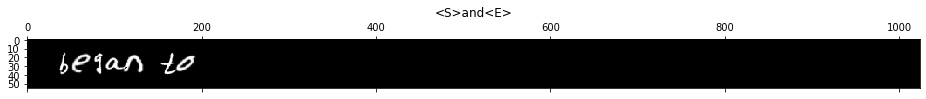

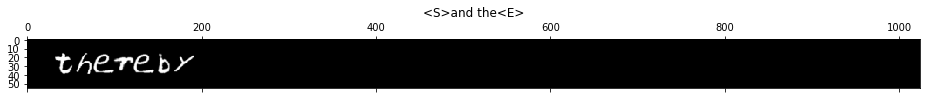

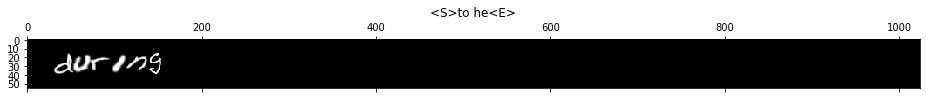

In [9]:
import argparse
from text_recognizer.lit_models import TransformerLitModel
from text_recognizer.models import LineCNNTransformer

model = LineCNNTransformer(
    data_config=dataset.config(),
    args=argparse.Namespace()
)

lit_model = TransformerLitModel.load_from_checkpoint(
    "../training/logs/default/version_21/checkpoints/epoch=039-val_loss=2.256-val_cer=0.774.ckpt",
    model=model,
    args=argparse
)


for i in range(5):
    x, y = dataset.data_train[i]
    pred = lit_model(x.unsqueeze(0))
    pred_sentence = "".join(dataset.mapping[_] for _ in pred[0].tolist() if _ != 3)
    true_sentence = convert_y_label_to_string(y)
    plt.matshow(x.squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(pred_sentence)

for i in range(5):
    x, y = dataset.data_test[i]
    pred = lit_model(x.unsqueeze(0))
    pred_sentence = "".join(dataset.mapping[_] for _ in pred[0].tolist() if _ != 3)
    true_sentence = convert_y_label_to_string(y)
    plt.matshow(x.squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(pred_sentence)